#Super Desafio

## Montar uma visualização com mais informações do DATASUS

### Dados
- Valores aprovados por ano/mês atendimento;
- Quantidade de óbitos por ano/mês atendimento;
- Quantidade média de atendimento por ano/mês antendimento.

#Preparação das bibliotecas e carga dos dados

In [ ]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#variaveis de working (auxiliares)
wrk_var_milhao = 1.e6

In [ ]:
#carga dos dados de quantidade de obitos
uri_qtde_obitos="https://raw.githubusercontent.com/victorscouto/bootcamp-alura-datascience/main/dados/qtde_obitos.csv"
dados_qtde_obitos=pd.read_csv(uri_qtde_obitos,
                              encoding= "ISO-8859-1",
                              skiprows= 3,
                              sep=";",
                              skipfooter= 12,
                              thousands=".",
                              decimal=",",
                              engine="python")

In [ ]:
#carga dos dados de tempo medio permanencia no hospital
uri_tempo_medio_permanencia="https://raw.githubusercontent.com/victorscouto/bootcamp-alura-datascience/main/dados/tempo_medio_permanencia.csv"
dados_tempo_medio_permanencia=pd.read_csv(uri_tempo_medio_permanencia,
                              encoding= "ISO-8859-1",
                              skiprows= 3,
                              sep=";",
                              skipfooter= 12,
                              thousands=".",
                              decimal=",",
                              engine="python")

In [ ]:
#carga dos dados de valores totais aprovados
uri_valor_aprovado="https://raw.githubusercontent.com/victorscouto/bootcamp-alura-datascience/main/dados/valores_aprovados_gastos.csv"
dados_valor_aprovado=pd.read_csv(uri_valor_aprovado,
                              encoding= "ISO-8859-1",
                              skiprows= 3,
                              sep=";",
                              skipfooter= 12,
                              thousands=".",
                              decimal=",",
                              engine="python")

##Montar bases para correlacionar, montar referências 2010/2020

In [ ]:
colunas_ref_2010_2020 = dados_valor_aprovado.columns[151:283].tolist()
colunas_ref_2010_2020

['2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',
 '2014/Mai',
 '2014/Jun',
 '2014/Jul',
 '2014/Ago',
 '2014/Set',
 '2014/Out',
 '2014/Nov',
 '2014/Dez',
 '2015/Jan',
 '2015/Fev',
 '2015/Mar',
 '2015/Abr',
 '2015/Mai',
 '2015/Jun',
 '2015/Jul',
 '2015/Ago',
 '2015/Set',
 '2015/Out',
 '2015/Nov',
 '2015/Dez',
 '2016/Jan',
 '2016/Fev',
 '2016/Mar',
 '2016/Abr',
 '2016/Mai',

#Preparação e Manipulação dos dados

##Avaliação dos dados de obitos

<function matplotlib.pyplot.show>

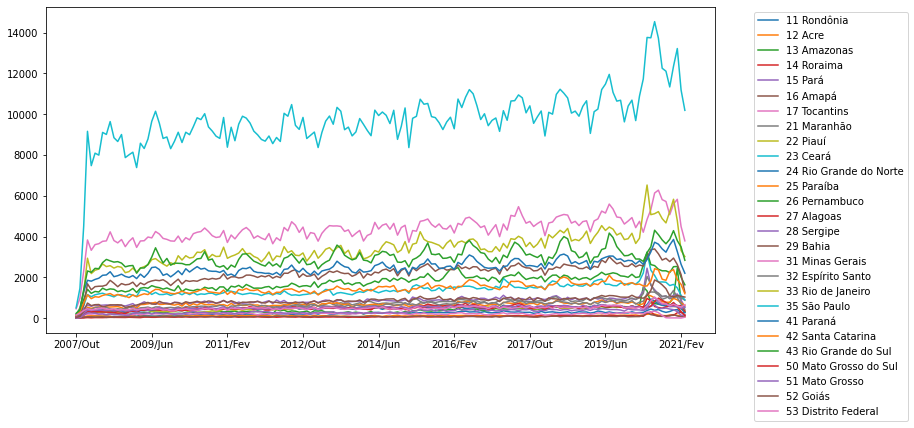

In [ ]:
#filtrando apenas a colunas que possuem dados (retirando colunas com observacoes nulas)
colunas_usaveis_obitos=dados_qtde_obitos.mean().index.tolist()

#inserindo a coluna Unidade da Federação para filtro na lista
colunas_usaveis_obitos.insert(0, "Unidade da Federação")

#montando um novo dataframe para usar a Unidade da Federação como index
usaveis_obitos = dados_qtde_obitos[colunas_usaveis_obitos]

#removendo a coluna "Total"
usaveis_obitos = usaveis_obitos.drop(labels="Total", axis=1)

#substituindo o index para "Unidade da Federação"
usaveis_obitos = usaveis_obitos.set_index("Unidade da Federação")

#plotando para avaliar outlier, algum dado que possa atrapalhar estudos mais detalhados
usaveis_obitos.T.plot(figsize=(12,6))

plt.legend(bbox_to_anchor=(1.05,1))
plt.show

#Avaliando os dados, aparentemente nenhum período atípico
#Base poderia se adequar a amostra das outras bases para cruzar referências

##Avaliação dos dados de tempo medio de permanencia no hospital

<function matplotlib.pyplot.show>

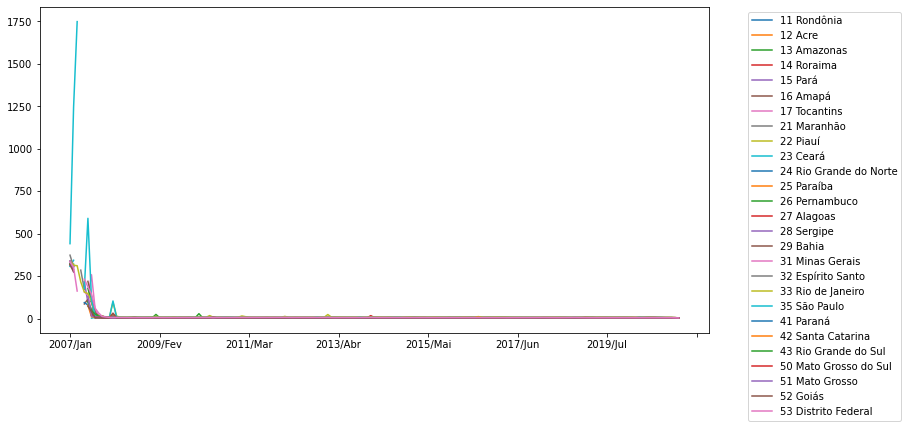

In [ ]:
#filtrando apenas a colunas que possuem dados (retirando colunas com observacoes nulas)
colunas_usaveis_tempo_perm=dados_tempo_medio_permanencia.mean().index.tolist()

#inserindo a coluna Unidade da Federação para filtro na lista
colunas_usaveis_tempo_perm.insert(0, "Unidade da Federação")

#montando um novo dataframe para usar a Unidade da Federação como index
usaveis_tempo_perm = dados_tempo_medio_permanencia[colunas_usaveis_tempo_perm]

#removendo a coluna "Total"
usaveis_tempo_perm = usaveis_tempo_perm.drop(labels="Total", axis=1)

#substituindo o index para "Unidade da Federação"
usaveis_tempo_perm = usaveis_tempo_perm.set_index("Unidade da Federação")

#plotando para avaliar outlier, algum dado que possa atrapalhar estudos mais detalhados
usaveis_tempo_perm.T.plot(figsize=(12,6))

plt.legend(bbox_to_anchor=(1.05,1))
plt.show

#usaveis_tempo_perm.T.head(24)

#algumas conclusões relevantes:
#---> Neste arquivo que estamos estudando, os dados de 2007 estão apresentando comportamento estranho
#---> O Estado de São Paulo em 2008/Jan ainda está com um valor outlier, muito disproporcional ao restante
#---> É provavel que utilizar a partir de 2010, será uma leitura de dados mais padronizados
#---> (Estou tentando fugir de problemas de "represamento dos dados")

##Avaliação dos dados de valor aprovado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


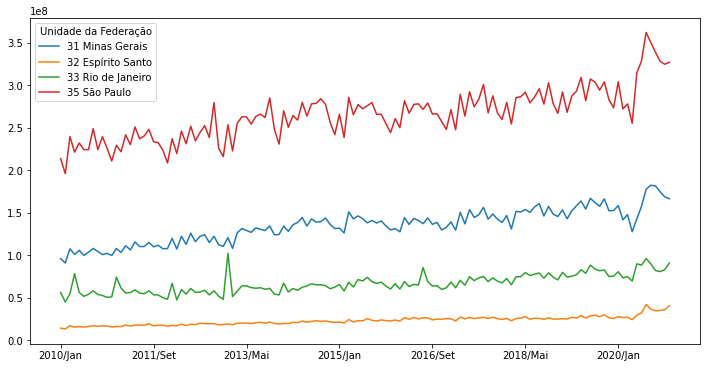

In [ ]:
#filtrando apenas a colunas que possuem dados (retirando colunas com observacoes nulas)
colunas_usaveis_valor_aprovado=dados_valor_aprovado.mean().index.tolist()

#inserindo a coluna Unidade da Federação para filtro na lista
colunas_usaveis_valor_aprovado.insert(0, "Unidade da Federação")

#montando um novo dataframe para usar a Unidade da Federação como index
usaveis_valor_aprovado = dados_valor_aprovado[colunas_usaveis_valor_aprovado]

#
usaveis_valor_aprovado["regiao"] = dados_valor_aprovado["Unidade da Federação"].str.slice(stop=1).apply(
    lambda x: 'Norte'    if x == '1' else 
              'Nordeste' if x == '2' else
              'Sudeste'  if x == '3' else
              'Sul'      if x == '4' else 'Centro-Oeste')

#removendo a coluna "Total"
usaveis_valor_aprovado = usaveis_valor_aprovado.drop(labels="Total", axis=1)

#substituindo o index para "Unidade da Federação"
usaveis_valor_aprovado = usaveis_valor_aprovado.set_index("Unidade da Federação")

#plotando para avaliar outlier, algum dado que possa atrapalhar estudos mais detalhados
#usaveis_valor_aprovado[colunas_ref_2010_2020].T.plot(figsize=(12,6))

#filtrando apenas os estados da regiao sudeste
valores_aprovados_sudeste = usaveis_valor_aprovado[usaveis_valor_aprovado['regiao'] == 'Sudeste']

#plotando apenas as colunas de 2010 a 2020
valores_aprovados_sudeste[colunas_ref_2010_2020].T.plot(figsize=(12,6))

#plt.legend(bbox_to_anchor=(1.05,1))
#plt.show

#conclusões com esta base, período de 2008/Jan é uma amostra com outlier
#possivelmente algum problema de cadastramento

In [ ]:
#ajustando formatação de valor decimal para visualizar melhor
pd.options.display.float_format = '{:,.2f}'.format

#filtrando apenas a colunas que possuem dados (retirando colunas com observacoes nulas)
colunas_usaveis=dados.mean().index.tolist()

#inserindo a coluna Unidade da Federação para filtro na lista
colunas_usaveis.insert(0, "Unidade da Federação")

#montando um novo dataframe para usar a Unidade da Federação como index
usaveis = dados[colunas_usaveis]

#alterando o index para utilizar a coluna Unidade da Federação
usaveis = usaveis.set_index("Unidade da Federação")

#testando o comando slice com essa nova base
usaveis[["2021/Jan" , "2021/Fev" , "2021/Mar"]]


##Os problemas de uma visualização em torta:

- Visualização em fatias é muito difícil de avaliar a proporção ou tamanho

- Gráfico muito difícil de fazer comparação

- Só é fácil de visualizar se ele estiver ordenado, com fácil leitura das legendas e com proporções bem disproporcionais, fácil de visualizar a diferença

- Nunca será um gráfico de informação precisa, necessário tomar muito cuidado para seu uso não gerar informações enviesadas

In [ ]:
#montando um gráfico de pizza para mostrar visualização ruim

#filtramos a última referência (coloquei -2 pois no dataframe usaveis ainda tem a coluna "Total")
mes_mais_recente = usaveis.columns[-2]

#com a referencia do filtro, montamos uma Series com essa referência
amostra_mais_recente = usaveis[mes_mais_recente]

#plotando no formato de torta
amostra_mais_recente.plot(kind='pie')

In [ ]:
#plotando no formato de torta com valores fora de ordem
amostra_mais_recente.sample(frac=1).plot(kind='pie')

#Desafio #01: Montar uma tabela de comparação para seu estado

##Para tentar refinar informação com proporções (%)

In [ ]:
#preparando uma amostra correlacionando as proporções de gastos
#sort_values() em uma série de dados não precisa descrever qual coluna será ordenado,
#inclusive se tentar forçar essa informação, vai gerar erro
amostra_mais_recente = amostra_mais_recente.sort_values(ascending=False)
amostra_mais_recente / amostra_mais_recente.loc["35 São Paulo"]

In [ ]:
#montando um plot no formato barra
(amostra_mais_recente / amostra_mais_recente.loc["35 São Paulo"]).plot(kind='bar')

#Desafio #02: Estudar a documentação matplotlib e Pandas para colocar grid no gráfico

In [ ]:
#montando um plot no formato barra
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#montando um plot em barra de cor vermelha
ax = (amostra_mais_recente / amostra_mais_recente.loc["35 São Paulo"]).plot(kind='bar', color='red')

#ajustando o título do gráfico, ajustando o tamanho da fonte
plt.title( "Valores gastos em saúde, por unidade de Federação", fontsize=14)

#ajustando o ticker para formatar o valor decimal e evitar notação científica
#informação editada aparece no eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#ajustando texto que irá aparecer no eixo y, editando o tamanho da fonte
ax.set_ylabel("Gastos normalizados por São Paulo", fontsize=10)

#com o método grid() editamos o sentido da linha com o "axis", o estilo da linha
#"linesytle" e a cor com "color"
plt.grid(axis="y", linestyle=':', color='blue')
plt.show()
